In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('cars.csv')

df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [3]:
# Checks if there are any missing values in the data.
df.isna().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [4]:
features =  ['Brand', 'Model', 'Year', 'Kilometers_Driven',
             'Fuel_Type', 'Transmission', 'Owner_Type',
             'Mileage', 'Engine', 'Power', 'Seats']

target = 'Price'

In [5]:
X = df[features]
y = df[target]

In [6]:
print(X.shape)
print(y.shape)

(100, 11)
(100,)


In [7]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Building the Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Brand', 'Model', 'Fuel_Type', 'Transmission'])
    ] )

In [9]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine',
                                                   'Power']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model',
                                                   'Fuel_Type',
                                                   'Transmission'])])),
                ('regressor', LinearRegression())])

In [11]:
y_pred = pipeline.predict(X_test)
print(y_pred)

[1289080.0957413   699999.69159755 1299996.67579475 1289080.0957413
  850003.07159428 1064544.98875711 1018398.93389844  499996.89368595
 2395679.40331101  863576.67203921 2566394.29407148  599999.05774388
  499996.32432681  700000.12576945  499998.6302843  1548010.56430379
 4000005.91509906 1064544.98875711  766459.51257698  800007.38958358]


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"MSE: {mse}")
print(f"r2_score: {r2}")

MSE: 63040194039.39286
r2_score: 0.9229196135729133


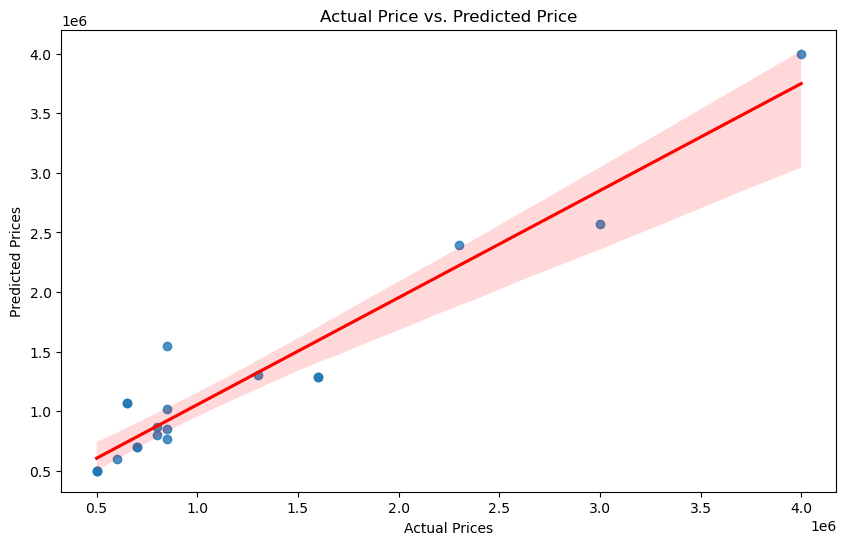

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs. Predicted Price')
plt.show()

In [15]:
single_datapoint = X_test.iloc[[19]]
print(single_datapoint)

      Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
31  Hyundai  Elantra  2017              32000    Diesel    Automatic   

   Owner_Type  Mileage  Engine  Power  Seats  
31     Second       22    1582    126      5  


In [16]:
y_single_pred = pipeline.predict(single_datapoint)
y_single_pred

array([800007.38958358])